In [1]:
import sys, os
sys.path.insert(0, '../')
sys.path.insert(0, '../python_src/')

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns

import homology
import chomology

In [2]:

# NV = 3
# NE = 3

# DIM = 2

# edgei = [0, 0, 1]
# edgej = [1, 2, 2]

# L = np.array([10.0, 10.0], float)

# vert_pos = np.zeros(DIM*NV, float)
# vert_pos[0:DIM] = [0, 1]
# vert_pos[DIM:2*DIM] = [1, 1]
# vert_pos[2*DIM:3*DIM] = [0, 0]

# corner_strains = np.array([0, 3, 5])

NV = 5
NE = 6

DIM = 2

edgei = [0, 0, 1, 2, 1, 3]
edgej = [1, 2, 3, 3, 4, 4]

L = np.array([10.0, 10.0], float)

vert_pos = np.zeros(DIM*NV, float)
vert_pos[0:DIM] = [0, 1]
vert_pos[DIM:2*DIM] = [1, 1]
vert_pos[2*DIM:3*DIM] = [0, 0]
vert_pos[3*DIM:4*DIM] = [1, 0]
vert_pos[4*DIM:5*DIM] = [2.5, 0.5]

corner_strains = np.array([0, 5, 3, 2, 6, 4, 1])


print("pos", vert_pos)
    
graph = chomology.Graph(NV, NE, edgei, edgej)
embed = chomology.Embedding2D(vert_pos, L)

corners = chomology.find_corners_2D(graph, embed)

print(corners)

# vertex_time = chomology.perform_corner_transform(corners, corner_strains, graph, True)

# print(vertex_time)

comp = chomology.construct_corner_complex_2D(corners, graph)

print("Corner Complex:")

# for i in range(comp.ncells):
#     print(i, comp.get_label(i), comp.get_dim(i), comp.get_facets(i), comp.get_cofacets(i))

subcomplex_order = chomology.perform_watershed_transform(corner_strains, comp, ascend=True, co=True)

print(subcomplex_order)

filt_asc = chomology.construct_star_filtration(corner_strains, subcomplex_order, comp, ascend=True, co=True)
filt_desc = chomology.construct_star_filtration(corner_strains, subcomplex_order, comp, ascend=False, co=True)

for i in range(comp.ncells):
    print(i, filt_asc.get_time(i), filt_asc.get_subcomplex_order(i))

print("Corner Filtration")
print("Ascending", filt_asc.get_filtration())
print("Descending", filt_desc.get_filtration())

graph_comp = chomology.construct_graph_complex(graph, False)

filt_asc = chomology.reduce_filtration(filt_asc, comp, graph_comp)
filt_desc = chomology.reduce_filtration(filt_desc, comp, graph_comp)

for i in range(graph_comp.ncells):
    print(i, filt_asc.get_time(i), filt_asc.get_subcomplex_order(i))

print("Graph Filtration")
print("Ascending", filt_asc.get_filtration())
print("Descending", filt_desc.get_filtration())


pos [0.  1.  1.  1.  0.  0.  1.  0.  2.5 0.5]
[[0, 1, 2], [1, 0, 3], [1, 3, 4], [2, 0, 3], [3, 1, 2], [3, 1, 4], [4, 1, 3]]
Corner Complex:
[0, 5, 3, 2, 6, 4, 1]
0 0.0 0
1 0.0 0
2 0.0 0
3 1.0 1
4 1.0 1
5 0.0 0
6 0.0 0
7 3.0 3
8 2.0 2
9 1.0 1
10 1.0 1
11 0.0 0
12 5.0 5
13 3.0 3
14 2.0 2
15 6.0 6
16 4.0 4
17 1.0 1
18 0.0 0
19 5.0 5
20 3.0 3
21 2.0 2
22 6.0 6
23 4.0 4
24 1.0 1
Corner Filtration
Ascending [0, 2, 1, 11, 6, 5, 18, 4, 3, 17, 9, 10, 24, 14, 8, 21, 13, 7, 20, 16, 23, 12, 19, 15, 22]
Descending [3, 2, 1, 15, 7, 8, 22, 0, 12, 5, 19, 4, 16, 10, 23, 13, 9, 20, 14, 6, 21, 17, 24, 11, 18]
0 0.0 0
1 0.0 0
2 0.0 0
3 1.0 1
4 1.0 1
5 0.0 0
6 0.0 0
7 3.0 3
8 2.0 2
9 1.0 1
10 1.0 1
Graph Filtration
Ascending [0, 2, 1, 6, 5, 4, 3, 9, 10, 8, 7]
Descending [3, 2, 1, 7, 8, 0, 5, 4, 10, 9, 6]


In [3]:
print("Calculating persistence pairs...")

pairs = chomology.calc_extended_persistence(filt_asc, filt_desc, graph_comp)


print("Number Pairs:", len(pairs[0])+len(pairs[1])+len(pairs[2]))
     
print(pairs)

print("Ascending")
for (i, j) in pairs[0]:
    print(graph_comp.get_dim(i), graph_comp.get_dim(j), i, j, filt_asc.get_time(i), filt_asc.get_time(j))

print("Descending")
for (i, j) in pairs[1]:
    print(graph_comp.get_dim(i), graph_comp.get_dim(j), i, j, filt_desc.get_time(i), filt_desc.get_time(j))
    
print("Complete")

Calculating persistence pairs...
[[], [], [], [0, 1], [0, 2], [], [], [2, 5], [5, 6], [1, 6], [2, 6], [6], [1], [2], [10, 11, 13], [9, 11, 12], [0], [4, 13, 16], [5], [8, 11, 18], [7, 13, 18], [3, 12, 16]]
[[], [], [], [0, 1], [0, 2], [], [], [2, 5], [5, 6], [], [], [0], [], [], [10, 11, 13], [9, 11, 12], [], [4, 13, 16], [], [8, 11, 18], [7, 8, 10], [3, 4, 7, 8, 9]]
Number Pairs: 11
([(2, 6), (1, 5), (4, 9), (3, 10)], [(1, 7), (2, 8), (0, 5), (4, 10)], [(0, 3), (7, 9), (8, 6)])
Ascending
0 1 2 6 0.0 0.0
0 1 1 5 0.0 0.0
0 1 4 9 1.0 1.0
0 1 3 10 1.0 1.0
Descending
0 1 1 7 6.0 6.0
0 1 2 8 6.0 6.0
0 1 0 5 5.0 5.0
0 1 4 10 4.0 4.0
Complete


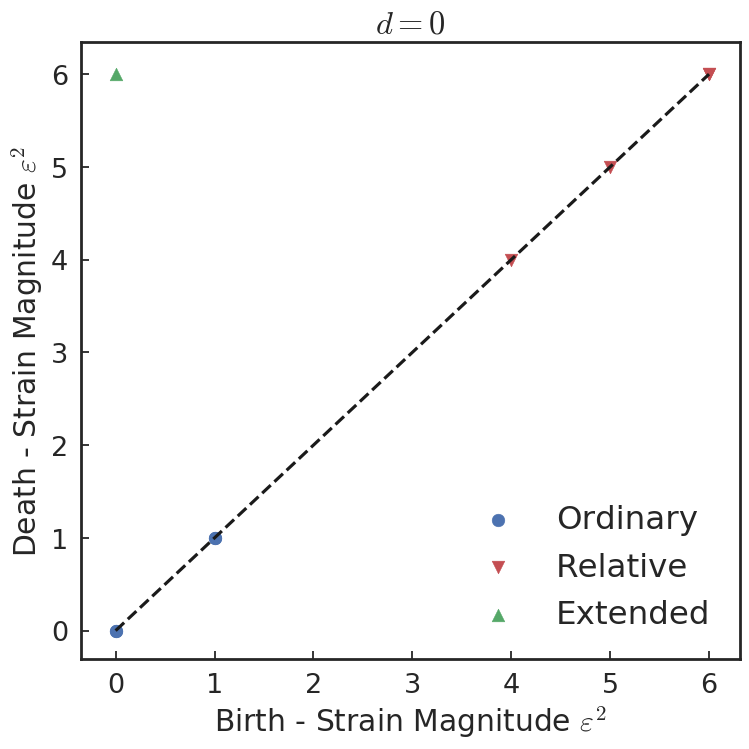

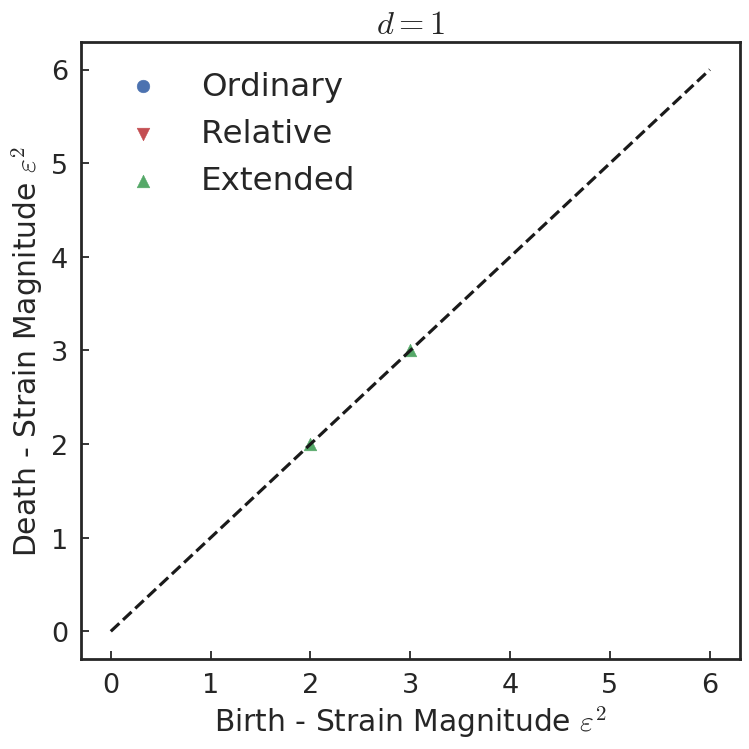

In [5]:
mpl.rcParams['mathtext.fontset'] = 'cm'
sns.set(color_codes=True, palette='deep')
sns.set_style('ticks', {'xtick.direction': 'in','ytick.direction': 'in', 'axes.linewidth': 2.0})

sns.set_context('talk', font_scale=1.5)

for d in [0, 1]:

    fig = plt.figure(figsize=(8, 8))

    ax1 = fig.add_subplot(1,1,1)

    birth = []
    death = []
    for (i, j) in pairs[0]:
        if comp.get_dim(i) == d:
            birth.append(filt_asc.get_time(i))
            death.append(filt_asc.get_time(j))

    ax1.scatter(birth, death, marker='o', color='b', label="Ordinary")

    birth = []
    death = []
    for (i, j) in pairs[1]:
        if comp.get_dim(i) == d:
            birth.append(filt_desc.get_time(i))
            death.append(filt_desc.get_time(j))

    ax1.scatter(birth, death, marker='v', color='r', label="Relative")

    birth = []
    death = []
    for (i, j) in pairs[2]:
        if comp.get_dim(i) == d:
            birth.append(filt_asc.get_time(i))
            death.append(filt_desc.get_time(j))

    ax1.scatter(birth, death, marker='^', color='g', label="Extended")


    ax1.plot(np.linspace(np.min(corner_strains), np.max(corner_strains), 100), 
             np.linspace(np.min(corner_strains), np.max(corner_strains), 100), 'k--')

    ax1.set_title(r"$d={}$".format(d))

    ax1.set_xlabel(r"Birth - Strain Magnitude $\varepsilon^2$")
    ax1.set_ylabel(r"Death - Strain Magnitude $\varepsilon^2$")

    # ax1.set_xscale('log')
    # ax1.set_yscale('log')

    ax1.legend(fontsize='medium')

    plt.tight_layout()

    plt.show()






# TIME = 0

# birth = [[] for i in range(mcomp.dim+1)]
# persistence = [[] for i in range(mcomp.dim+1)]

# for (i, j) in pairs:
    
#     if j is None or rfilt.get_time(i) == rfilt.get_time(j):
#         continue
        
    
    
#     d = graph_comp.get_dim(i)
#     birth[d].append(rfilt.get_time(i))
#     persistence[d].append(rfilt.get_time(j)-rfilt.get_time(i))

# fig = plt.figure(figsize=(8,8))
        
# ax1 = fig.add_subplot(1,1,1)

# ax1.set_yscale('log')

# ax1.scatter(birth[0], persistence[0], marker='.', color='b', label="$0$-cycles")
# ax1.scatter(birth[1], persistence[1], marker='.', color='r', label="$1$-cycles")

# ax1.set_xlabel(r"Birth - Strain Magnitude $\varepsilon^2$")
# ax1.set_ylabel(r"Persistence - Strain Magnitude $\varepsilon^2$")
# # ax1.set_ylim(1e-8, 1e0)

# # ax1.hlines(10**(-1.9), -0.4, 1.0)

# # ax1.legend(fontsize='large')

# plt.tight_layout()

# plt.show()


In [3]:
subcomplex_order = chomology.perform_watershed_transform(-np.array(corner_strains), comp, ascend=True, co=True)
filt_asc = chomology.construct_star_filtration(-np.array(corner_strains), subcomplex_order, comp, ascend=True, co=True)
print(filt_asc.get_filtration())

subcomplex_order = chomology.perform_watershed_transform(corner_strains, comp, ascend=True, co=True)
filt_desc = chomology.construct_star_filtration(corner_strains, subcomplex_order, comp, ascend=False, co=True)
print(filt_desc.get_filtration())


[3, 2, 1, 15, 7, 8, 22, 0, 12, 5, 19, 4, 16, 10, 23, 13, 9, 20, 14, 6, 21, 17, 24, 11, 18]
[3, 2, 1, 15, 7, 8, 22, 0, 12, 5, 19, 4, 16, 10, 23, 13, 9, 20, 14, 6, 21, 17, 24, 11, 18]


In [2]:
graph = chomology.Graph(3, 3, [0, 0, 1], [1, 2, 2])

comp = chomology.construct_graph_complex(graph, False)

for i in range(comp.ncells):
    print(i, comp.get_label(i), comp.get_dim(i), comp.get_facets(i), comp.get_cofacets(i))

filt_asc = chomology.construct_star_filtration([1, 2, 3], [1, 2, 3], comp, ascend=True, co=True)
filt_desc = chomology.construct_star_filtration([1, 2, 3], [1, 2, 3], comp, ascend=False, co=True)

print(filt_asc.get_filtration())
print(filt_desc.get_filtration())

for i in range(comp.ncells):
    print(i, filt_asc.get_time(i), filt_asc.get_subcomplex_order(i))

    
pairs = chomology.calc_extended_persistence(filt_asc, filt_desc, comp)

print(pairs)

birth_cycles = chomology.calc_birth_cycles(filt_asc, comp)

print(birth_cycles)

0 0 0 [] [3, 4]
1 1 0 [] [3, 5]
2 2 0 [] [4, 5]
3 0 1 [0, 1] []
4 1 1 [0, 2] []
5 2 1 [1, 2] []
[0, 1, 3, 2, 4, 5]
[2, 1, 5, 0, 4, 3]
0 1.0 1
1 1.0 1
2 2.0 2
3 1.0 1
4 2.0 2
5 3.0 3
[[], [], [0, 1], [], [0, 3], [1, 3], [3], [1], [5, 6, 7], [0], [4, 6, 9], [2, 7, 9]]
[[], [], [0, 1], [], [0, 3], [], [0], [], [5, 6, 7], [], [4, 6, 9], [2, 4, 5]]
([(1, 3), (2, 4)], [(1, 5), (0, 4)], [(0, 2), (5, 3)])
[[0], [1], [2], [3], [4], [2, 4, 5]]
{}
